## 1.Logistic Regression

## Step1: Data Gathering

In [142]:
path = r"C:\Users\Akshay\OneDrive\Desktop\datasets\datasets-train.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


## Step2: Performing basic data quality checks

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [144]:
df.shape

(136429, 14)

In [145]:
df['Product ID'].unique()

array(['L50096', 'M20343', 'L49454', ..., 'M18739', 'L50940', 'L48036'],
      shape=(9976,), dtype=object)

In [146]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [147]:
df.duplicated().sum()

np.int64(0)

In [148]:
df = df.drop_duplicates()

In [149]:
# Convert numeric columns to proper types
numeric_cols = ['air_temperature_k', 'process_temperature_k', 
                'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

## Step3: Separating data into X and Y features

In [150]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [151]:
X = df.drop(columns=['id','Machine failure','Product ID'])
Y = df[['Machine failure']]

In [152]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [153]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


## Step4 : Data Preprocessing and Data cleaning

In [154]:
cat = list(X.columns[X.dtypes=='object'])
num = list(X.columns[X.dtypes!='object'])
print(cat,num,sep='\n')

['Type']
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [155]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [156]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'), # data cleaning
    OneHotEncoder(handle_unknown='ignore',sparse_output=False) # feature scaling
)

In [157]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"), # data cleaning
    StandardScaler()
)

In [158]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat), # ('dummy_name',pipeline,list_of_columns)
    ('num',num_pipe,num)
]).set_output(transform='pandas')

In [159]:
pre

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [160]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF
0,0.0,1.0,0.0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
1,0.0,0.0,1.0,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
2,0.0,1.0,0.0,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
3,0.0,1.0,0.0,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
4,0.0,0.0,1.0,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


## Spliting data into training and testing

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=42)

In [163]:
ytrain = ytrain.iloc[:, 0]
ytest = ytest.iloc[:, 0]

In [164]:
xtrain.shape

(102321, 13)

In [165]:
xtrain.head()

,cat__Type_H,cat__Type_L,cat__Type_M,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF
76241,1.0,0.0,0.0,-0.785493,0.114737,0.091316,-0.370333,-0.178362,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
487,0.0,0.0,1.0,-1.376179,-0.968164,0.235475,-0.405618,0.900356,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
34659,0.0,0.0,1.0,1.255061,0.692284,1.403159,-0.864323,0.790921,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
46441,0.0,1.0,0.0,0.556977,0.692284,-0.766427,0.158942,0.900356,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
54811,0.0,0.0,1.0,1.684651,1.991765,0.776070,-0.358571,-0.100194,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [166]:
xtest.shape

(34108, 13)

In [167]:
xtest.head()

,cat__Type_H,cat__Type_L,cat__Type_M,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF
123128,0.0,1.0,0.0,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568
54705,0.0,1.0,0.0,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
40016,0.0,1.0,0.0,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
75025,0.0,1.0,0.0,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
120421,0.0,1.0,0.0,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [168]:
ytrain.head()

76241    0
487      0
34659    0
46441    0
54811    0
Name: Machine failure, dtype: int64

In [169]:
ytest.head()

123128    1
54705     0
40016     0
75025     0
120421    0
Name: Machine failure, dtype: int64

## Step6: Model building

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [172]:
model.classes_

array([0, 1])

In [173]:
ypred_train = model.predict(xtrain)

In [174]:
yprob_train = model.predict_proba(xtrain)

In [175]:
yprob_train[0]

array([0.99883596, 0.00116404])

In [176]:
model.classes_

array([0, 1])

In [177]:
ypred_train[:5]

array([0, 0, 0, 0, 0])

In [178]:
ytrain.head()

76241    0
487      0
34659    0
46441    0
54811    0
Name: Machine failure, dtype: int64

## Model Evaluation

In [179]:
model.score(xtrain,ytrain)

0.9962080120405391

In [180]:
model.score(xtest,ytest)

0.9961006215550604

## EValuation Matrix

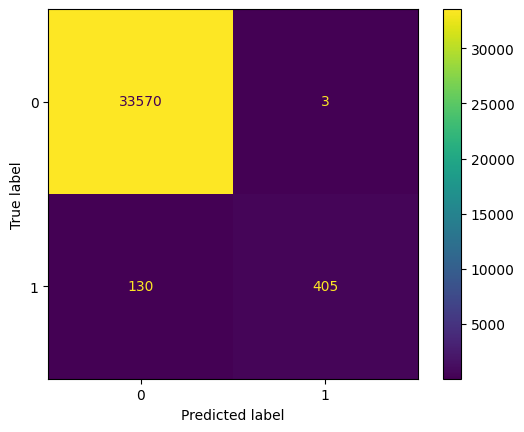

In [181]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

## Classification Report

In [182]:
ypred_test = model.predict(xtest)

In [183]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33573
           1       0.99      0.76      0.86       535

    accuracy                           1.00     34108
   macro avg       0.99      0.88      0.93     34108
weighted avg       1.00      1.00      1.00     34108



In [184]:
from sklearn.metrics import f1_score
f1_score(ytest,ypred_test,average='macro')

0.9284918722542967

## All the scores are greater than 80%(0.80), we can consider this model for final model building

### Step7: Out of Sample Predictions

In [185]:
path2 = r"C:\Users\Akshay\OneDrive\Desktop\datasets\datasets-test.csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [186]:
xnew = xnew.drop(columns='id')

In [187]:
xnew.isna().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [188]:
pre

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [189]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF
0,0.0,1.0,0.0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
1,0.0,1.0,0.0,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
2,0.0,1.0,0.0,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
3,0.0,0.0,1.0,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
4,0.0,0.0,1.0,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [190]:
Machine_failure_predicted = model.predict(xnew_pre)

In [191]:
Machine_failure_predicted[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [192]:
xnew['Machine_failure_predicted'] = Machine_failure_predicted

In [193]:
xnew

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine_failure_predicted
0,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0
1,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0
2,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0
3,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0
4,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0,0
90950,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0,0
90951,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0,0
90952,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0,0


## Saving results to the csv file

In [194]:
xnew.to_csv('Machine_failure_prediction_by_LR.csv',index=False)

## Random Forest Classifier

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
model = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
model.fit(xtrain,ytrain)

,n_estimators,5
,criterion,'gini'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [197]:
model.score(xtrain,ytrain)

0.9893277039903832

In [198]:
model.score(xtest,ytest)

0.9890641491732145

## Hypertuning parameter

In [199]:
params = {
    'n_estimators':[5,10,35,50,75,100,150],
    'max_depth':[3,5,7,9,11]
}

In [200]:
from sklearn.model_selection import RandomizedSearchCV

In [201]:
base_model = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=base_model,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [3, 5, ...], 'n_estimators': [5, 10, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [202]:
rscv.best_params_

{'n_estimators': 50, 'max_depth': 7}

In [203]:
rscv.best_score_

np.float64(0.9311990559048279)

In [204]:
best_rfc = rscv.best_estimator_

In [205]:
best_rfc.score(xtrain,ytrain)

0.996247104699915

In [206]:
best_rfc.score(xtest,ytest)

0.9961006215550604

## Model Evaluation

In [207]:
from sklearn.metrics import ConfusionMatrixDisplay

In [208]:
ypred_test = model.predict(xtest)
ypred_test[:]

array([1, 0, 0, ..., 0, 0, 0], shape=(34108,))

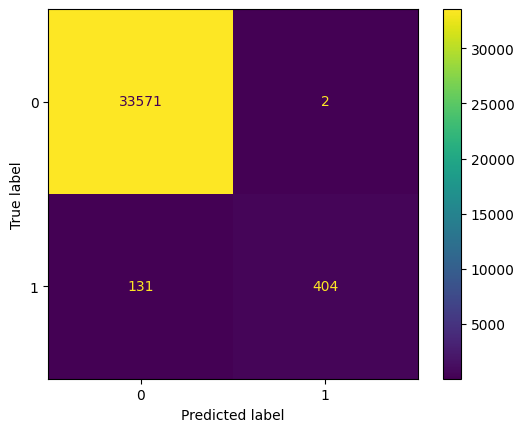

In [209]:
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

In [210]:
from sklearn.metrics import classification_report

In [211]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     33573
           1       0.99      0.30      0.47       535

    accuracy                           0.99     34108
   macro avg       0.99      0.65      0.73     34108
weighted avg       0.99      0.99      0.99     34108



## 3.Decision Tree Classifier

In [212]:
from sklearn.tree import DecisionTreeClassifier

In [213]:
dtc = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=3,
    criterion='gini'
)

In [214]:
dtc.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,3
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [215]:
dtc.score(xtrain,ytrain)

0.996227558370227

In [216]:
dtc.score(xtest,ytest)

0.9961006215550604

## Hyperparameter tuning with GridsearchCV

In [218]:
from sklearn.model_selection import GridSearchCV

In [219]:
parameters = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'criterion':['gini','entropy']
}

In [220]:
base_model = DecisionTreeClassifier()

In [221]:
gscv = GridSearchCV(estimator=base_model,param_grid=parameters,cv=4,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

c:\Machine Learning1418\repository\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
576 fits failed out of a total of 5184.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Machine Learning1418\repository\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Machine Learning1418\repository\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Machine Learning1418\repository\venv\Lib\si

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [1, 2, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [222]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [223]:
gscv.best_score_

np.float64(0.9316211305309756)

In [224]:
gscv.score(xtrain,ytrain)

0.9322702171206994

In [225]:
gscv.score(xtest,ytest)

0.9283420193497355

In [226]:
best_dtc = gscv.best_estimator_
best_dtc

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,9
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## MODEL Evaluation

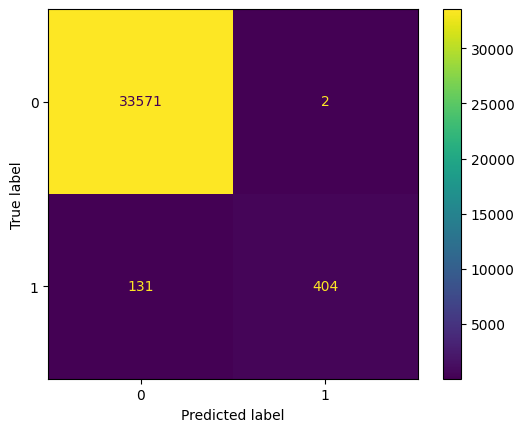

In [227]:
from sklearn.metrics import  ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc,xtest,ytest)

## Classification report

In [228]:
from sklearn.metrics import classification_report
ypred_test = best_dtc.predict(xtest)
ypred_test[:5]

array([1, 0, 0, 0, 0])

In [229]:
ytest.head()

123128    1
54705     0
40016     0
75025     0
120421    0
Name: Machine failure, dtype: int64

In [230]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33573
           1       1.00      0.76      0.86       535

    accuracy                           1.00     34108
   macro avg       1.00      0.88      0.93     34108
weighted avg       1.00      1.00      1.00     34108



## Plot the decision tree

In [231]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [232]:
xtrain.columns

Index(['cat__Type_H', 'cat__Type_L', 'cat__Type_M', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'num__Rotational speed [rpm]',
       'num__Torque [Nm]', 'num__Tool wear [min]', 'num__TWF', 'num__HDF',
       'num__PWF', 'num__OSF', 'num__RNF'],
      dtype='object')

In [233]:
feature_names = xtrain.columns
feature_names

Index(['cat__Type_H', 'cat__Type_L', 'cat__Type_M', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'num__Rotational speed [rpm]',
       'num__Torque [Nm]', 'num__Tool wear [min]', 'num__TWF', 'num__HDF',
       'num__PWF', 'num__OSF', 'num__RNF'],
      dtype='object')

In [234]:
best_dtc.classes_

array([0, 1])

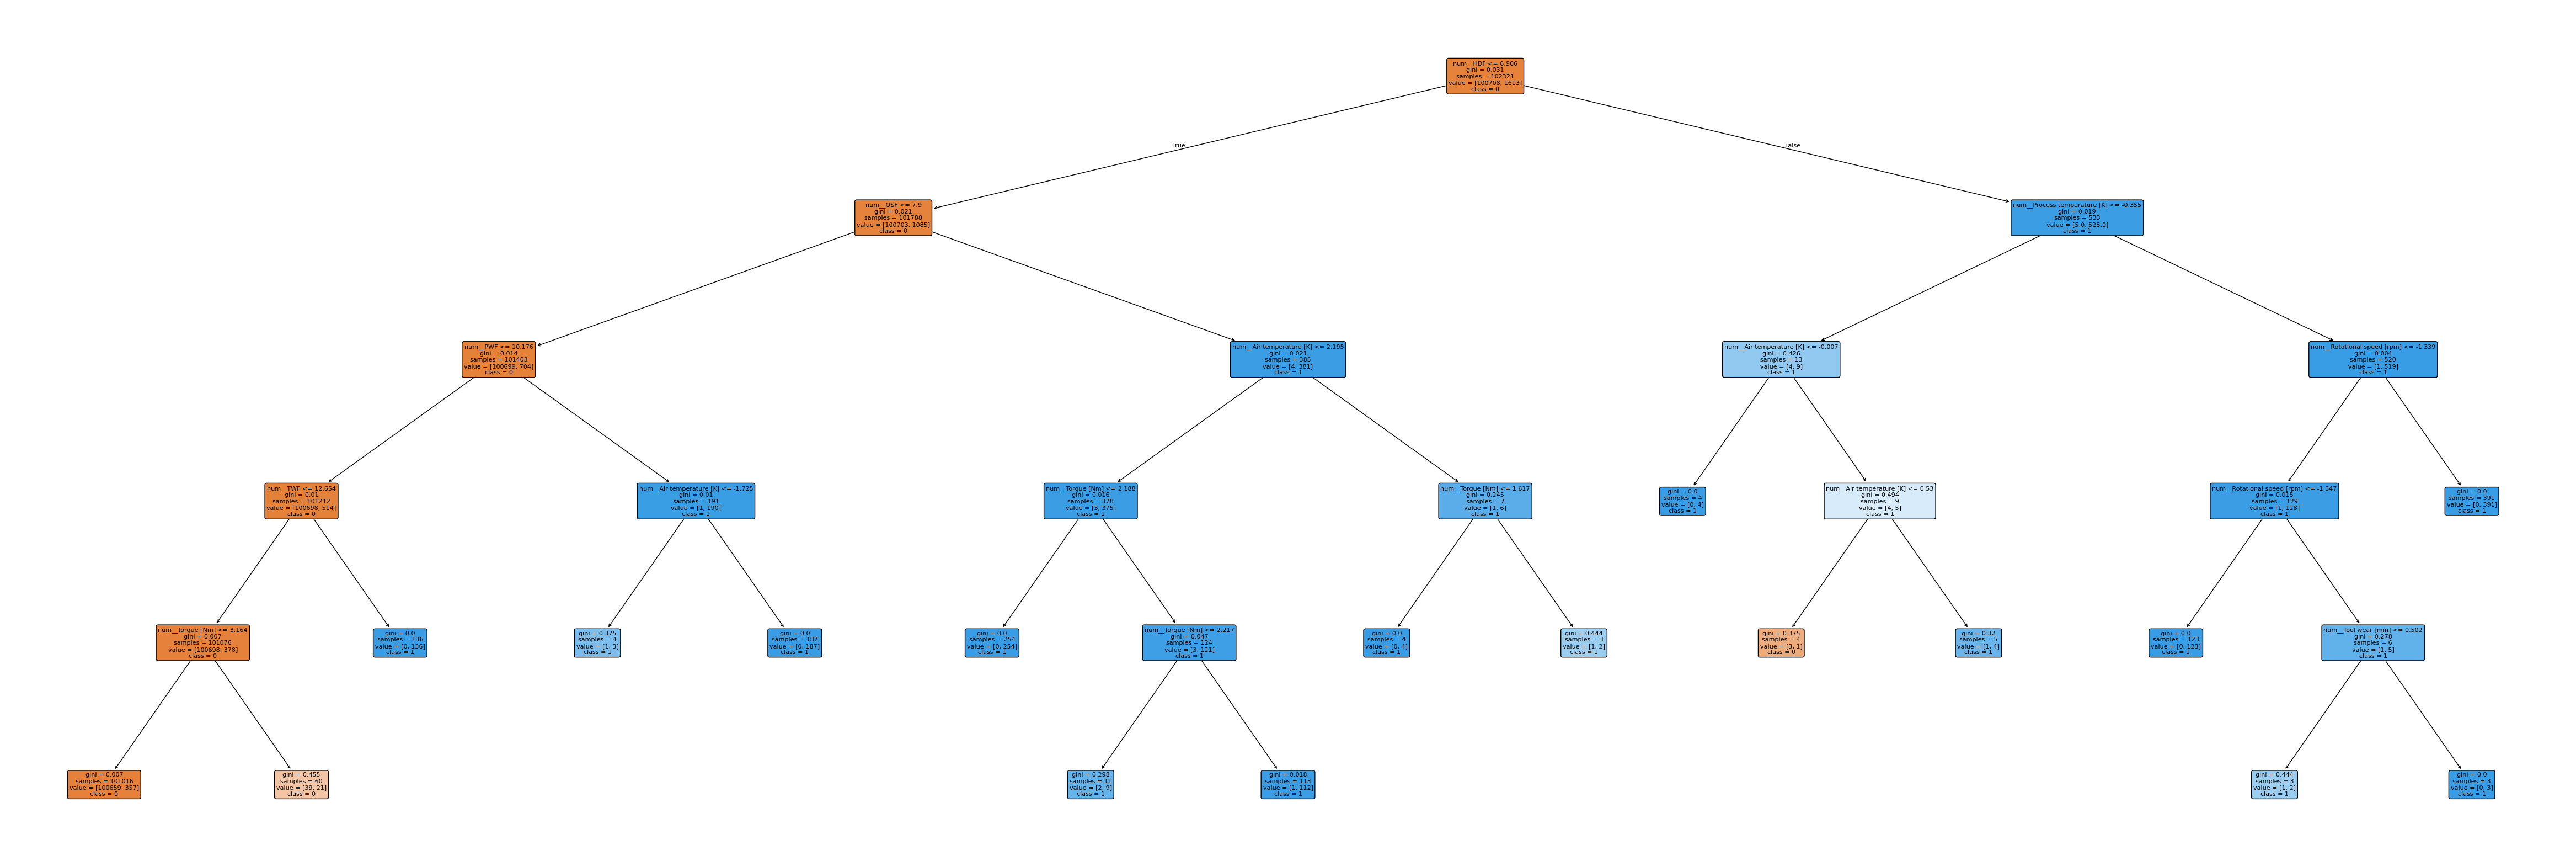

In [235]:
plt.figure(figsize=(60,20))
plot_tree(
    dtc,
    feature_names=feature_names,
    class_names=[str(c) for c in dtc.classes_],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

In [236]:
best_dtc.feature_importances_

array([0.        , 0.        , 0.        , 0.00085632, 0.00142389,
       0.00302932, 0.00620135, 0.00152877, 0.11077159, 0.41841121,
       0.15343952, 0.30433804, 0.        ])

In [237]:
imp_features_bymodel = pd.Series(best_dtc.feature_importances_,index=feature_names)
imp_features_bymodel.sort_values(ascending=False)

num__HDF                        0.418411
num__OSF                        0.304338
num__PWF                        0.153440
num__TWF                        0.110772
num__Torque [Nm]                0.006201
num__Rotational speed [rpm]     0.003029
num__Tool wear [min]            0.001529
num__Process temperature [K]    0.001424
num__Air temperature [K]        0.000856
cat__Type_L                     0.000000
cat__Type_M                     0.000000
cat__Type_H                     0.000000
num__RNF                        0.000000
dtype: float64

<Axes: >

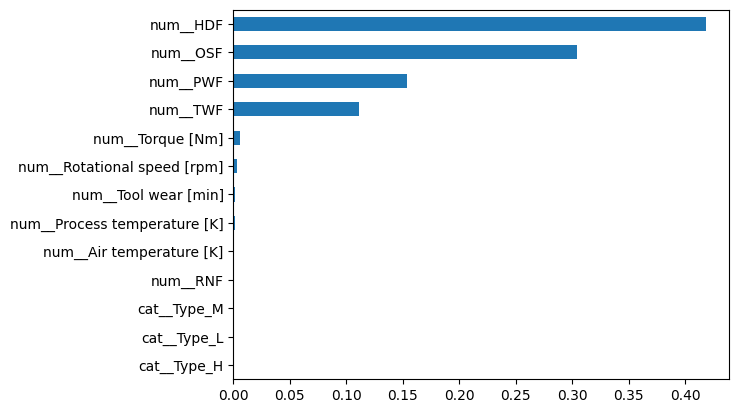

In [238]:
imp_features_bymodel.sort_values(ascending=True).plot(kind='barh')

## we can consider this model for final model building and use it for out of sample predictions

## OUt of Samples predictions

In [239]:
path2 = r"C:\Users\Akshay\OneDrive\Desktop\datasets\datasets-test.csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [240]:
xnew = xnew.drop(columns='id')

In [241]:
pre

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [242]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF
0,0.0,1.0,0.0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
1,0.0,1.0,0.0,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
2,0.0,1.0,0.0,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
3,0.0,0.0,1.0,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
4,0.0,0.0,1.0,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [243]:
Machine_failure_predicted = best_dtc.predict(xnew_pre)

In [244]:
Machine_failure_predicted[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [245]:
xnew['Machine_failure_predicted '] = Machine_failure_predicted 

In [246]:
xnew.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine_failure_predicted
0,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0
1,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0
2,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0
3,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0
4,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0


## Saving results to the csv file

In [248]:
xnew.to_csv('Machine_failure_prediction_by_dtc.csv',index=False)

In [250]:
ytest.head()

123128    1
54705     0
40016     0
75025     0
120421    0
Name: Machine failure, dtype: int64

## AUC / ROC Curve  

AUC Score: 0.9487399615456458


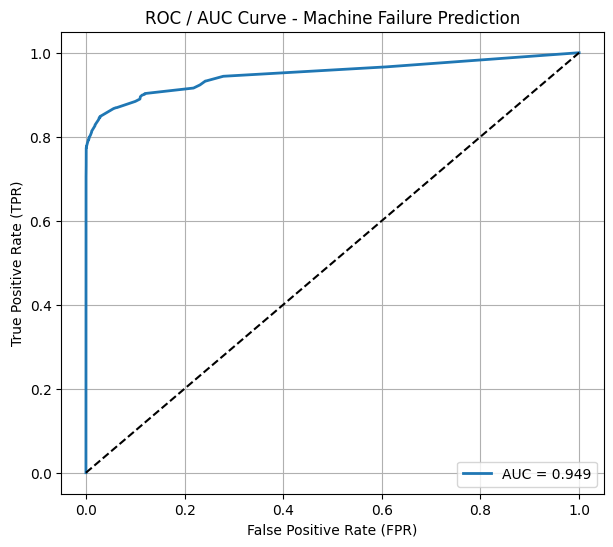

In [254]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Get predicted probabilities for class 1 (machine failure)
y_pred_proba = model.predict_proba(xtest)[:, 1]

# 2. Calculate False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)

# 3. Calculate AUC score
auc_score = roc_auc_score(ytest, y_pred_proba)
print("AUC Score:", auc_score)

# 4. Plot AUC Curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # baseline line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC / AUC Curve - Machine Failure Prediction")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
